Student Name: Vi Nguyen

Student ID: 13592629

# Assignment 2
Develop a classifier to predict whether the patient have breast cancer based on the given characteristics

## Solving a classification problem
In order to solve a classification problem, the following steps need to be taken:
##### Session 1: Introduction
- Find a suitable dataset -> Define the input dataset
- Explore the input dataset.
- After exploration, it may be needed to pre-process the dataset in real-world classification problems,i.e., to clean and pre-process the input dataset to make it ready for model development. Since we use a toy data set for the study purpose only, no preprecossing is required.

##### Session 2: Training and testing data
- Form the training dataset and test dataset
- Explore the training and testing dataset.

##### Session 3: Decision Tree classifier construction
- Develop a classifier by training a machine learning model using the training dataset
- Evaluate the classifier
- Deploy the classifier to solve the target classification problem (optional)

##### Session 4: Classifier construction
- Confusion Matrix
- Accuracy, recall, precision and F1 score


------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Session 1: Introduction

### Dataset

The breast_cancer dataset is loaded from the sklearn dataset.

Relevant Information about this dataset is as follows:
* Predicted attribute: target (whether the patient have breast cancer)
* Number of Instances: 569
* Number of Attributes: 31
* Attribute Information:
  - mean radius  
  - mean texture  
  ...
  - worst symmetry  
  - worst fractal dimension  
  - target


In [ ]:
# from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [ ]:
# Load the Breast Cancer dataset
cancer = load_breast_cancer()

# Convert the data to a pandas DataFrame
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)

# Add the target column to the DataFrame
df['target'] = cancer.target
pd.set_option('display.expand_frame_repr', True)

Dataset Exploration

In [ ]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [ ]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

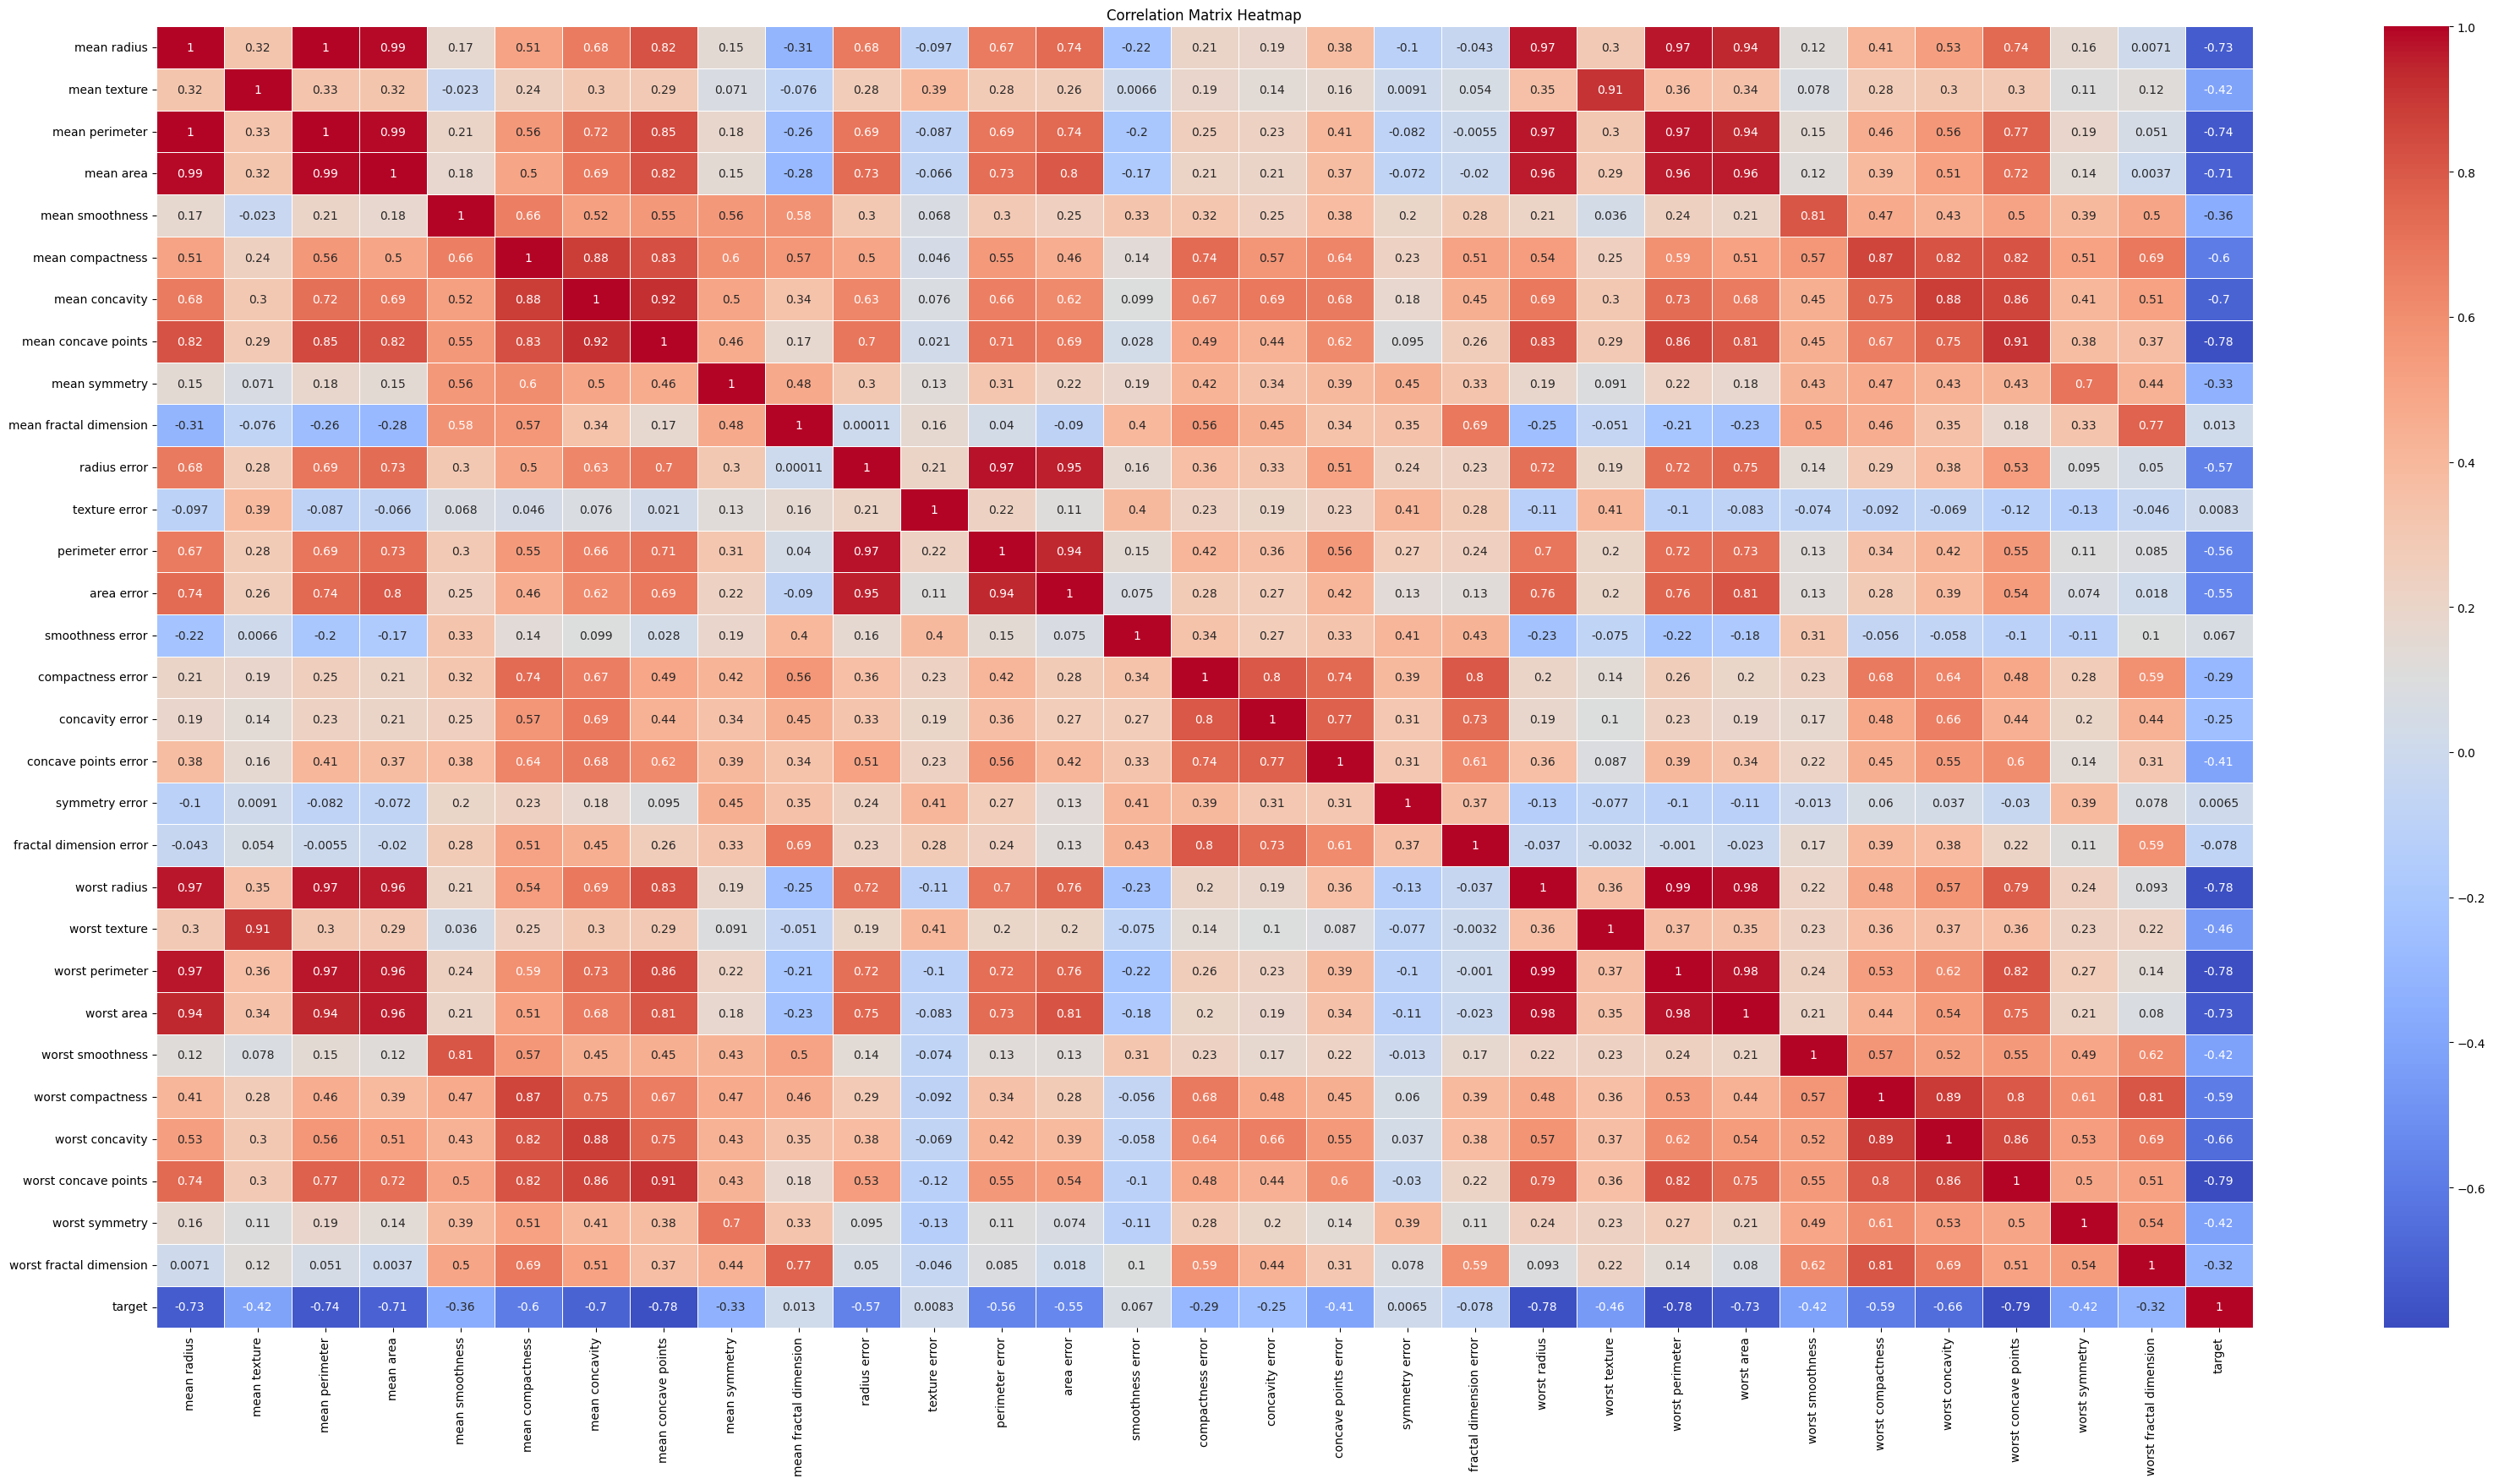

In [ ]:
import seaborn as sns
correlation_matrix = df.corr()
import matplotlib.pyplot as plt


# Create a heatmap
plt.figure(figsize=(40, 20))
sns.heatmap(correlation_matrix, annot =True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Session 2: Training, testing and validating data

In [ ]:
# Access the data and target
X = cancer.data  # Features - all the 30 variables / column names
y = cancer.target  # Target variable (labels) with the column name of "target"


from sklearn.model_selection import train_test_split
# Using train_test_split function to split the dataset into the training and test datasets,
# the percentage of samples in the test dataset is 30%
X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.3,
        random_state=42)


In [ ]:
# Get the last 63 samples from the test to be the future data samples
futureSample_X = X_test[-63:]
futureSample_y = y_test[-63:]

# Remove the last 63 samples from the test dataset
X_test = X_test[:-63]
y_test = y_test[:-63]

After this, we split the data into three part
- 70% for training ~ 398 rows
- 20% for testing ~ 114 rows
- 10% for validating ~ 63 rows

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Session 3: Decision Tree classifier construction

Develop a decision tree classifier

In [ ]:
class DecisionTree:
    def __init__(self, max_depth=None, min_samples_split=2, min_samples_leaf=1):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split # minimum number of samples that must be present in a node for the tree-building algorithm to consider splitting it further
        self.min_samples_leaf = min_samples_leaf #threshold on the minimum number of samples that a leaf node must contain

    def fit(self, X, y):
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))
        majority_class = np.bincount(y).argmax()

        # Stopping conditions
        if (depth >= self.max_depth) or (n_classes == 1) or (n_samples < self.min_samples_split):
            return Node(class_label=majority_class)

        # Find the best split
        best_gini = 1.0
        best_feature, best_threshold = None, None
        for feature in range(n_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_indices = X[:, feature] < threshold
                right_indices = X[:, feature] >= threshold
                if len(y[left_indices]) < self.min_samples_leaf or len(y[right_indices]) < self.min_samples_leaf:
                    continue
                gini = self._gini_impurity(y[left_indices], y[right_indices])
                if gini < best_gini:
                    best_gini = gini
                    best_feature = feature
                    best_threshold = threshold

        if best_gini == 1.0:
            return Node(class_label=majority_class)

        left_indices = X[:, best_feature] < best_threshold
        right_indices = X[:, best_feature] >= best_threshold
        left_subtree = self._grow_tree(X[left_indices], y[left_indices], depth + 1)
        right_subtree = self._grow_tree(X[right_indices], y[right_indices], depth + 1)

        return Node(feature=best_feature, threshold=best_threshold, left=left_subtree, right=right_subtree)

    def predict(self, X):
        return [self._predict_tree(x, self.root) for x in X]

    def _predict_tree(self, x, node):
        if node.is_leaf():
            return node.class_label
        if x[node.feature] < node.threshold:
            return self._predict_tree(x, node.left)
        else:
            return self._predict_tree(x, node.right)

    def _gini_impurity(self, left, right):
        total_samples = len(left) + len(right)
        p_left = len(left) / total_samples
        p_right = len(right) / total_samples

        gini_left = 1.0 - sum([(np.sum(left == c) / len(left))**2 for c in np.unique(left)])
        gini_right = 1.0 - sum([(np.sum(right == c) / len(right))**2 for c in np.unique(right)])

        gini = p_left * gini_left + p_right * gini_right
        return gini

class Node:
    def __init__(self, feature=None, threshold=None, class_label=None, left=None, right=None):
        self.feature = feature
        self.threshold = threshold
        self.class_label = class_label
        self.left = left
        self.right = right

    def is_leaf(self):
        return self.class_label is not None


 Training a machine learning model using the training dataset

In [ ]:
# DT_clf = DecisionTree(max_depth=10)
DT_clf = DecisionTree(max_depth=10, min_samples_split=2, min_samples_leaf=1)
DT_clf.fit(X_train, y_train)

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Session 4: Classifier Evaluation

In [ ]:
def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

y_pred = DT_clf.predict(X_test)
outcome = accuracy(y_test, y_pred)

print("Accuracy:", outcome)

Accuracy: 0.9259259259259259


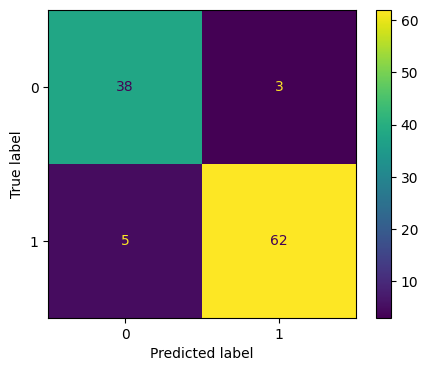

In [ ]:
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Display the confusion matrix using y_test and y_pred
fig,ax = plt.subplots(figsize=(5,4),dpi = 100)
cm = confusion_matrix(y_test, y_pred)
cmp = ConfusionMatrixDisplay(cm, display_labels = ["0", "1"])
cmp.plot(ax = ax);

Import module to evaluate the performance

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Evaluate the classifier's performance

imp_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {imp_accuracy:.2f}")

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90        41
           1       0.95      0.93      0.94        67

    accuracy                           0.93       108
   macro avg       0.92      0.93      0.92       108
weighted avg       0.93      0.93      0.93       108

Confusion Matrix:
 [[38  3]
 [ 5 62]]


Fitting and evaluating the validation set

In [ ]:
# Predicted class lables the samples in the futureSample dataset
solution_validate = DT_clf.predict(futureSample_X)
# Calculate the prediction accuracy
score_validate = accuracy_score(solution_validate, futureSample_y)
print (score_validate)

0.9206349206349206


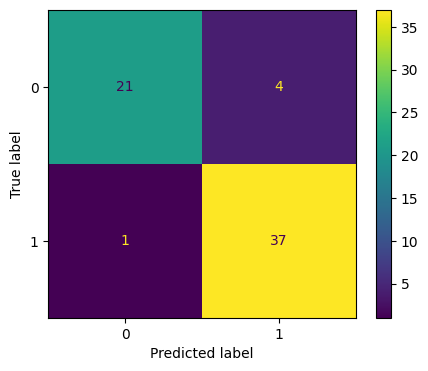

In [ ]:
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Display the confusion matrix using y_test and y_pred
fig,ax = plt.subplots(figsize=(5,4),dpi = 100)
cm = confusion_matrix(solution_validate, futureSample_y)
cmp = ConfusionMatrixDisplay(cm, display_labels = ["0", "1"])
cmp.plot(ax = ax);

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Evaluate the classifier's performance

imp_accuracy = accuracy_score(solution_validate, futureSample_y)
print(f"Accuracy: {imp_accuracy:.2f}")

classification_rep = classification_report(solution_validate, futureSample_y)
print("Classification Report:\n", classification_rep)

conf_matrix = confusion_matrix(solution_validate, futureSample_y)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.92
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.84      0.89        25
           1       0.90      0.97      0.94        38

    accuracy                           0.92        63
   macro avg       0.93      0.91      0.92        63
weighted avg       0.92      0.92      0.92        63

Confusion Matrix:
 [[21  4]
 [ 1 37]]


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Manual tunning

In [ ]:
def recall(y_true, y_pred):
    true_positive = np.sum((y_true == 1) & (y_pred == 1))
    actual_positive = np.sum(y_true == 1)
    recall = true_positive / actual_positive
    return recall


In [ ]:
DT1021_clf = DecisionTree(max_depth=10, min_samples_split=2, min_samples_leaf=1)
DT1021_clf.fit(X_train, y_train)
DT1021_clf_classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.84      0.89        25
           1       0.90      0.97      0.94        38

    accuracy                           0.92        63
   macro avg       0.93      0.91      0.92        63
weighted avg       0.92      0.92      0.92        63



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Define the range of values for max_depth, min_samples_split, and min_samples_leaf
max_depth_values = range(1, 11)
min_samples_split_values = range(2, 20)
min_samples_leaf_values = range(1, 20)

# Create an empty list to store recall scores
recall_scores = []

# Loop through combinations of max_depth, min_samples_split, and min_samples_leaf
for max_depth in max_depth_values:
    for min_samples_split in min_samples_split_values:
        for min_samples_leaf in min_samples_leaf_values:
            # Create a DecisionTreeClassifier with the current hyperparameters
            DT_clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

            # Fit the model on the training data
            DT_clf.fit(X_train, y_train)

            # Make predictions on the test data
            y_pred = DT_clf.predict(X_test)

            # Generate the classification report
            classification_rep = classification_report(y_test, y_pred, output_dict=True)

            # Extract the recall for class 1 (you can change this for a different class)
            recall = classification_rep['1']['recall']

            # Append the recall score to the list
            recall_scores.append((max_depth, min_samples_split, min_samples_leaf, recall))


In [ ]:
# Print or analyze the recall scores as needed
for max_depth, min_samples_split, min_samples_leaf, recall in recall_scores:
    print(f"Recall for max_depth={max_depth}, min_samples_split={min_samples_split}, min_samples_leaf={min_samples_leaf}:, recall = {recall:.2f}")

Recall for max_depth=1, min_samples_split=2, min_samples_leaf=1:, recall = 0.90
Recall for max_depth=1, min_samples_split=2, min_samples_leaf=2:, recall = 0.90
Recall for max_depth=1, min_samples_split=2, min_samples_leaf=3:, recall = 0.90
Recall for max_depth=1, min_samples_split=2, min_samples_leaf=4:, recall = 0.90
Recall for max_depth=1, min_samples_split=2, min_samples_leaf=5:, recall = 0.90
Recall for max_depth=1, min_samples_split=2, min_samples_leaf=6:, recall = 0.90
Recall for max_depth=1, min_samples_split=2, min_samples_leaf=7:, recall = 0.90
Recall for max_depth=1, min_samples_split=2, min_samples_leaf=8:, recall = 0.90
Recall for max_depth=1, min_samples_split=2, min_samples_leaf=9:, recall = 0.90
Recall for max_depth=1, min_samples_split=2, min_samples_leaf=10:, recall = 0.90
Recall for max_depth=1, min_samples_split=2, min_samples_leaf=11:, recall = 0.90
Recall for max_depth=1, min_samples_split=2, min_samples_leaf=12:, recall = 0.90
Recall for max_depth=1, min_samples_s

In [ ]:
# Define a tolerance for comparing recall values
tolerance = 0.01  # You can adjust this value as needed

# Filter the recall scores to keep only those within the tolerance of 1
filtered_recall_scores = [(max_depth, min_samples_split, min_samples_leaf, recall)
                          for max_depth, min_samples_split, min_samples_leaf, recall in recall_scores
                          if abs(recall - 1) < tolerance]

# Check if there are any filtered results and print them
if filtered_recall_scores:
    for max_depth, min_samples_split, min_samples_leaf, recall in filtered_recall_scores:
        print(f"Hyperparameters: max_depth={max_depth}, min_samples_split={min_samples_split}, min_samples_leaf={min_samples_leaf}, Recall = {recall:.4f}")
else:
    print("No combinations found with a recall of 1 (within the tolerance)")


Hyperparameters: max_depth=3, min_samples_split=2, min_samples_leaf=15, Recall = 1.0000
Hyperparameters: max_depth=3, min_samples_split=2, min_samples_leaf=16, Recall = 1.0000
Hyperparameters: max_depth=3, min_samples_split=2, min_samples_leaf=17, Recall = 1.0000
Hyperparameters: max_depth=3, min_samples_split=2, min_samples_leaf=18, Recall = 1.0000
Hyperparameters: max_depth=3, min_samples_split=2, min_samples_leaf=19, Recall = 1.0000
Hyperparameters: max_depth=3, min_samples_split=3, min_samples_leaf=15, Recall = 1.0000
Hyperparameters: max_depth=3, min_samples_split=3, min_samples_leaf=16, Recall = 1.0000
Hyperparameters: max_depth=3, min_samples_split=3, min_samples_leaf=17, Recall = 1.0000
Hyperparameters: max_depth=3, min_samples_split=3, min_samples_leaf=18, Recall = 1.0000
Hyperparameters: max_depth=3, min_samples_split=3, min_samples_leaf=19, Recall = 1.0000
Hyperparameters: max_depth=3, min_samples_split=4, min_samples_leaf=15, Recall = 1.0000
Hyperparameters: max_depth=3, mi

Hypeparameter tunning